# Аналіз рекламних кампаній Facebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='whitegrid')
plt.rcParams['figure.figsize']=(14, 7)

In [2]:
# Завантаження даних
try:
    df = pd.read_csv('facebook_ads_data (2.0).csv')
    print('Дані успішно завантажені')
except FileNotFoundError:
    print('ПОМИЛКА: Файл "facebook_ads_data (2.0).csv" не знайдено.')

Дані успішно завантажені


In [3]:
df.head()

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817


In [4]:
# Підготовка даних
df['ad_date'] = pd.to_datetime(df['ad_date'])
df['romi'] = (df['total_value'] - df['total_spend']) / df['total_spend']

df['romi'] = df['romi'].replace([np.inf, -np.inf], np.nan)
df['romi'].fillna(0)

print('\nПерші 5 рядків DataFrame з розрахованим ROMI:')
df.head()


Перші 5 рядків DataFrame з розрахованим ROMI:


,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,-0.156430
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,0.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,-0.047183


## 1. Аналіз за днями (2021 рік)

In [5]:
# Фільтруємо дані за 2021 рік
df_2021 = df[df['ad_date'].dt.year == 2021].copy()

# Групуємо дані по днях, підсумовуючи витрати та цінність
daily_data_2021 = df_2021.groupby('ad_date').agg(
    total_spend=('total_spend', 'sum'),
    total_value=('total_value', 'sum')
).reset_index()

# Розраховуємо щоденний ROMI на основі сумарних денних показників
daily_data_2021['romi'] = (daily_data_2021['total_value'] - daily_data_2021['total_spend']) / daily_data_2021['total_spend']
daily_data_2021['romi'] = daily_data_2021['romi'].replace([np.inf, -np.inf], np.nan)
daily_data_2021['romi'] = daily_data_2021['romi'].fillna(0)

# Розраховуємо рухоме середнє за 7 днів для згладжування графіків
window_size = 7
daily_data_2021['spend_rolling_avg'] = daily_data_2021['total_spend'].rolling(window=window_size).mean()
daily_data_2021['romi_rolling_avg'] = daily_data_2021['romi'].rolling(window=window_size).mean

daily_data_2021['romi_rolling_avg'] = daily_data_2021['romi_rolling_avg'].fillna(0)
daily_data_2021['spend_rolling_avg'] = daily_data_2021['spend_rolling_avg'].fillna(0)

print('Згруповані дані за 2021 рік:')
daily_data_2021.head()

Згруповані дані за 2021 рік:


,ad_date,total_spend,total_value,romi,spend_rolling_avg,romi_rolling_avg
0,2021-01-01,0.39,0.59,0.512821,0.0,<bound method Rolling.mean of Rolling [window=...
1,2021-01-02,7.74,6.90,-0.108527,0.0,<bound method Rolling.mean of Rolling [window=...
2,2021-01-04,70.06,68.47,-0.022695,0.0,<bound method Rolling.mean of Rolling [window=...
3,2021-01-05,81.15,61.68,-0.239926,0.0,<bound method Rolling.mean of Rolling [window=...
4,2021-01-06,142.77,145.97,0.022414,0.0,<bound method Rolling.mean of Rolling [window=...


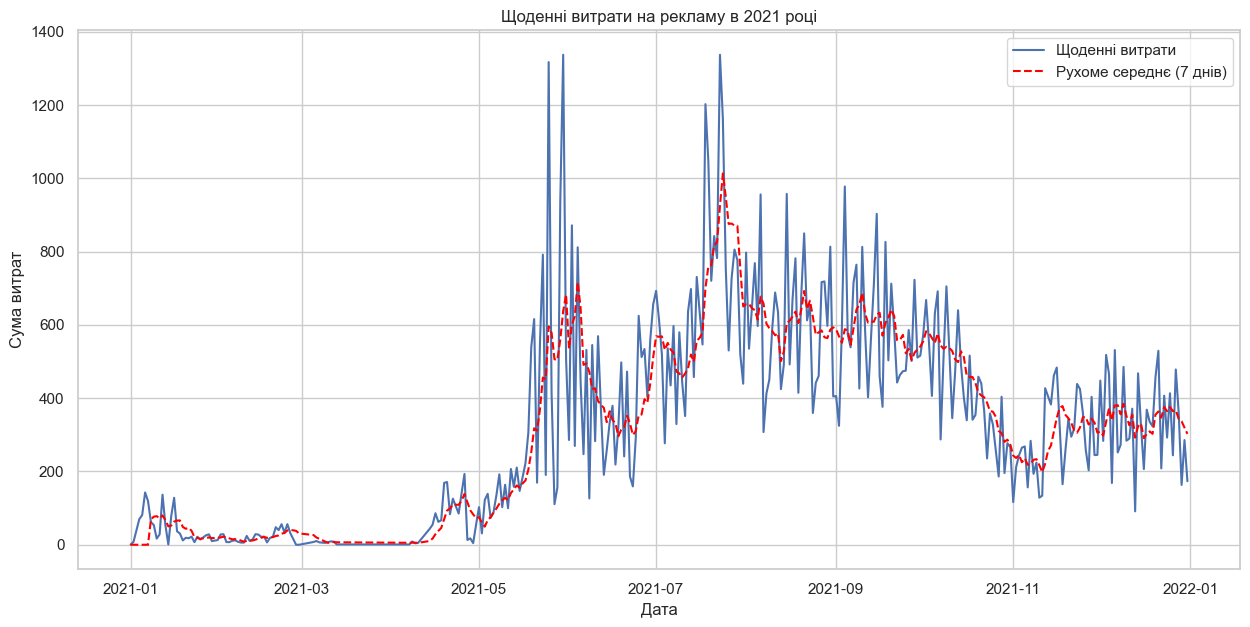

In [6]:
# Графік щоденних витрат на рекламу в 2021 році
plt.figure(figsize=(15, 7))

sns.lineplot(data=daily_data_2021, x='ad_date', y='total_spend', label='Щоденні витрати')
sns.lineplot(data=daily_data_2021, x='ad_date', y='spend_rolling_avg', label=f'Рухоме середнє ({window_size} днів)', color='red', linestyle='--')

plt.title('Щоденні витрати на рекламу в 2021 році')
plt.xlabel('Дата')
plt.ylabel('Сума витрат')

plt.legend()

plt.show()

In [7]:
daily_data_2021.head()

,ad_date,total_spend,total_value,romi,spend_rolling_avg,romi_rolling_avg
0,2021-01-01,0.39,0.59,0.512821,0.0,<bound method Rolling.mean of Rolling [window=...
1,2021-01-02,7.74,6.90,-0.108527,0.0,<bound method Rolling.mean of Rolling [window=...
2,2021-01-04,70.06,68.47,-0.022695,0.0,<bound method Rolling.mean of Rolling [window=...
3,2021-01-05,81.15,61.68,-0.239926,0.0,<bound method Rolling.mean of Rolling [window=...
4,2021-01-06,142.77,145.97,0.022414,0.0,<bound method Rolling.mean of Rolling [window=...


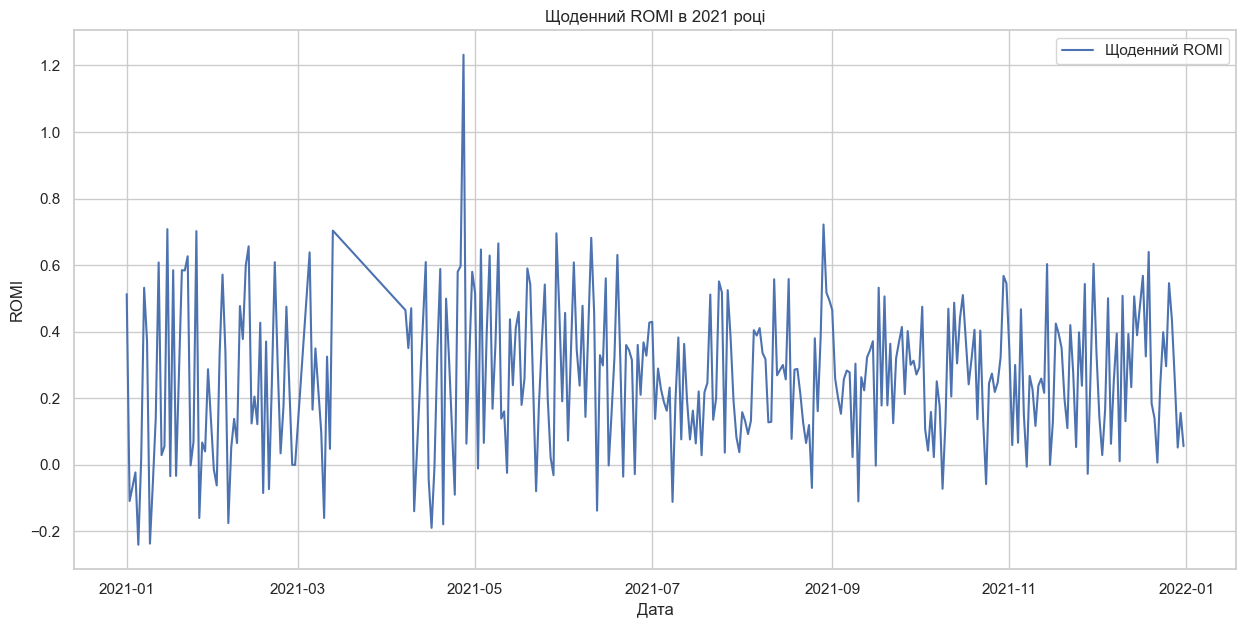

In [10]:
# Графік щоденного ROMI в 2021 році
plt.figure(figsize=(15, 7))
sns.lineplot(data=daily_data_2021, x='ad_date', y='romi', label='Щоденний ROMI')
plt.title('Щоденний ROMI в 2021 році')
plt.xlabel('Дата')
plt.ylabel('ROMI')
plt.legend()
plt.show()

## 2. Аналіз за назвою кампанії

In [12]:
# Групуємо дані за назвою кампанії, підсумовуючи витрати та цінність
campaign_data = df.groupby('campaign_name').agg(
    total_spend=('total_spend', 'sum'),
    total_value=('total_value', 'sum')
).reset_index()

# Розраховуємо загальний ROMI для кожної кампанії
campaign_data['romi'] = (campaign_data['total_value'] - campaign_data['total_spend']) / campaign_data['total_spend']
campaign_data.replace([np.inf, -np.inf], np.nan, inplace=True)
campaign_data['romi'] = campaign_data['romi'].fillna(0)

print("Дані, згруповані за кампаніями:")
campaign_data.head()

Дані, згруповані за кампаніями:


,campaign_name,total_spend,total_value,romi
0,Brand,539.92,670.15,0.241202
1,Crazy discounts,2175.29,2583.59,0.187699
2,Discounts,2856.39,3516.27,0.231019
3,Electronics,23920.42,29169.38,0.219434
4,Expansion,67212.82,83288.66,0.239178


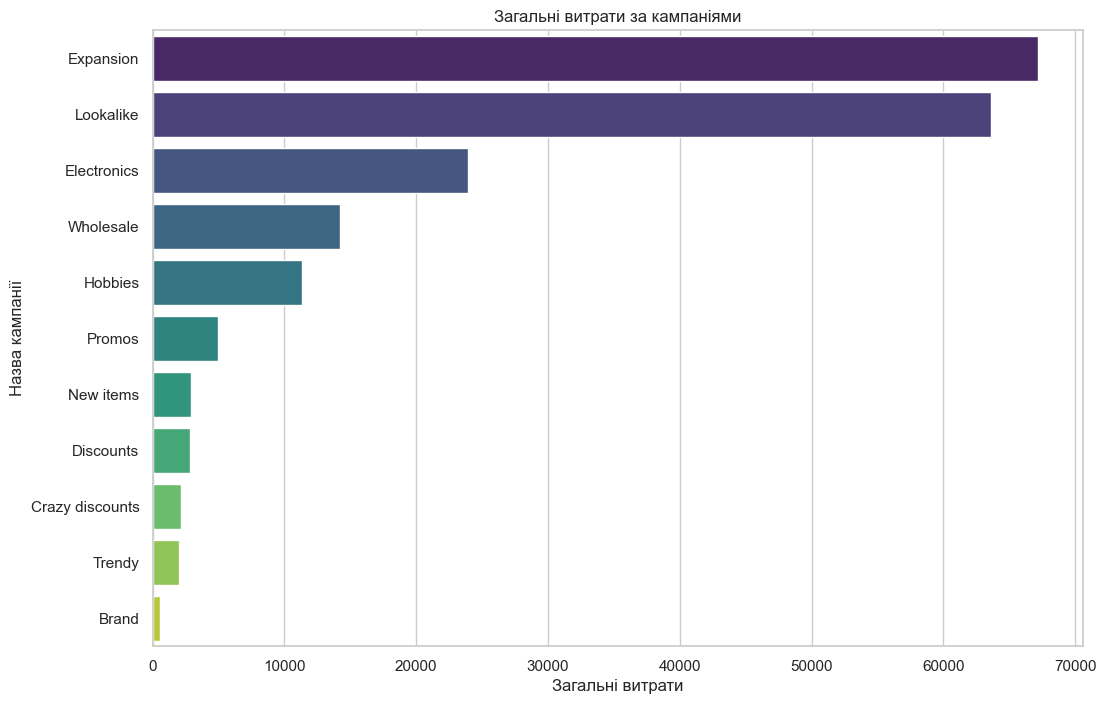

In [15]:
# Графік загальної суми витрат на рекламу в кожній з кампаній
campaign_data_sorted_spend = campaign_data.sort_values(by='total_spend', ascending=False)

plt.figure(figsize=(12, 8))

sns.barplot(data=campaign_data_sorted_spend, x='total_spend', y='campaign_name', hue='campaign_name', palette='viridis')

plt.title('Загальні витрати за кампаніями')
plt.xlabel('Загальні витрати')
plt.ylabel('Назва кампанії')

plt.show()

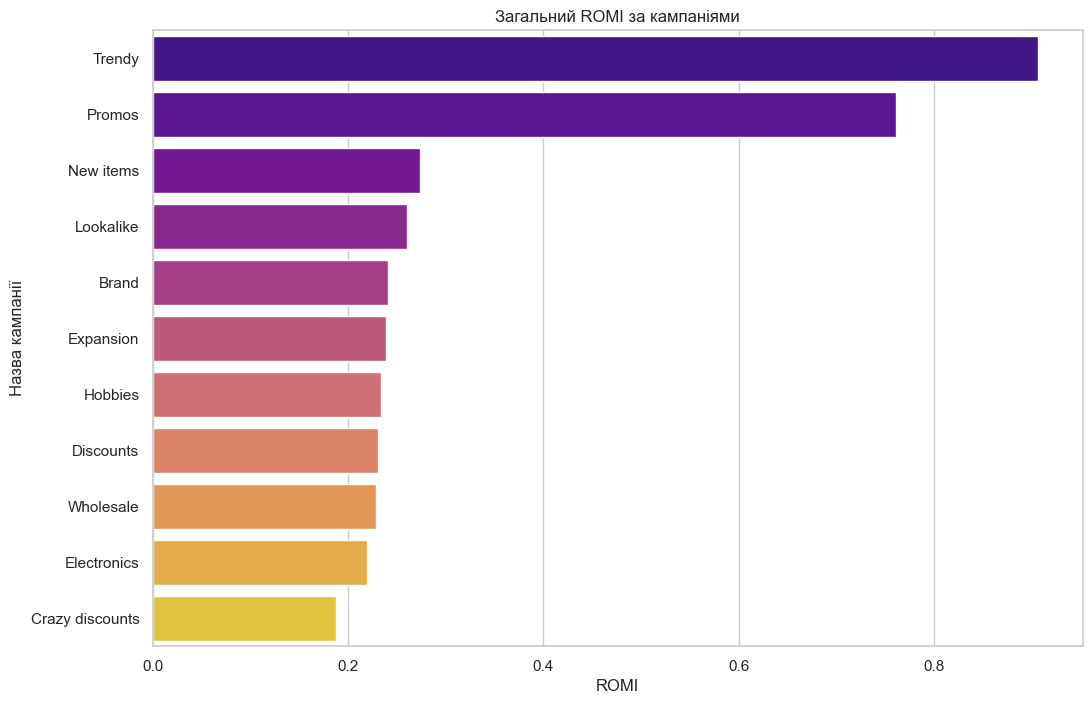

In [17]:
# Графік загального ROMI в кожній з кампаній
campaign_data_sorted_romi = campaign_data.sort_values(by='romi', ascending=False)

plt.figure(figsize=(12, 8))

sns.barplot(data=campaign_data_sorted_romi, x='romi', y='campaign_name', hue='campaign_name', palette='plasma')

plt.title('Загальний ROMI за кампаніями')
plt.xlabel('ROMI')
plt.ylabel('Назва кампанії')

plt.show()

## 3. Box plot розкиду щоденного ROMI

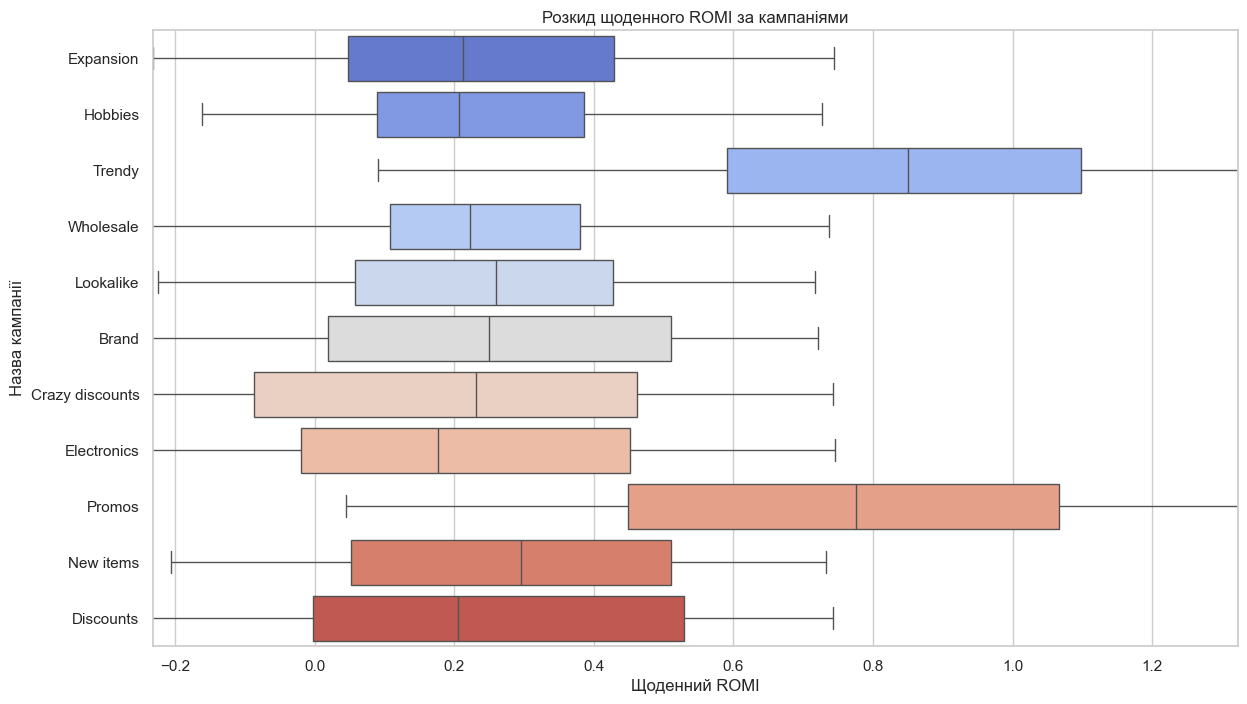

In [20]:
plt.figure(figsize=(14, 8))

sns.boxplot(data=df, x='romi', y='campaign_name', hue='campaign_name', palette='coolwarm')

plt.title('Розкид щоденного ROMI за кампаніями')
plt.xlabel('Щоденний ROMI')
plt.ylabel('Назва кампанії')

q_low = df['romi'].quantile(0.01)
q_high = df['romi'].quantile(0.99)
plt.xlim(q_low, q_high)

plt.show()

## 4. Гістограма розподілу ROMI

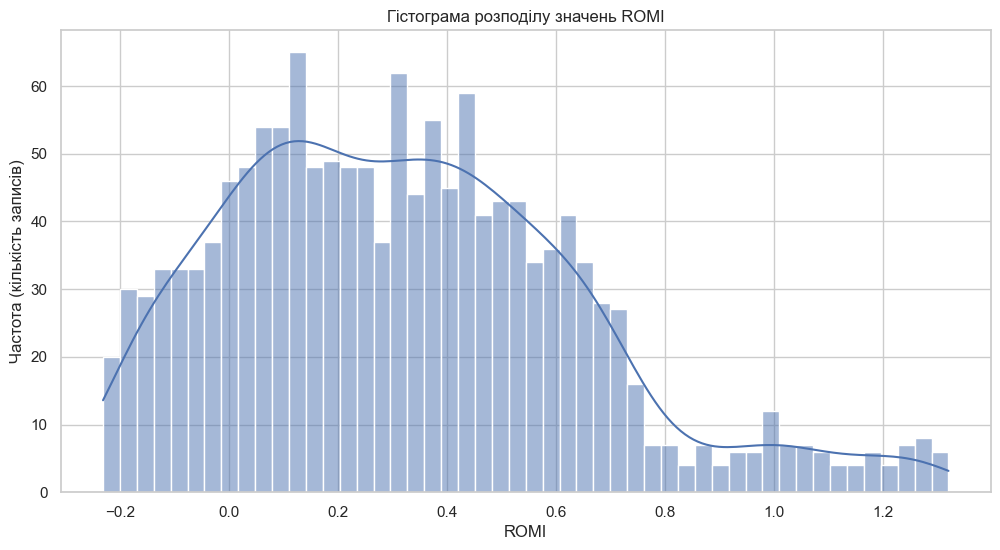

In [22]:
plt.figure(figsize=(12, 6))

romi_filtered = df['romi'][(df['romi'] > q_low) & (df['romi'] < q_high)]

sns.histplot(romi_filtered, bins=50, kde=True)

plt.title('Гістограма розподілу значень ROMI')
plt.xlabel('ROMI')
plt.ylabel('Частота (кількість записів)')

plt.show()

## 5. Теплова карта кореляції

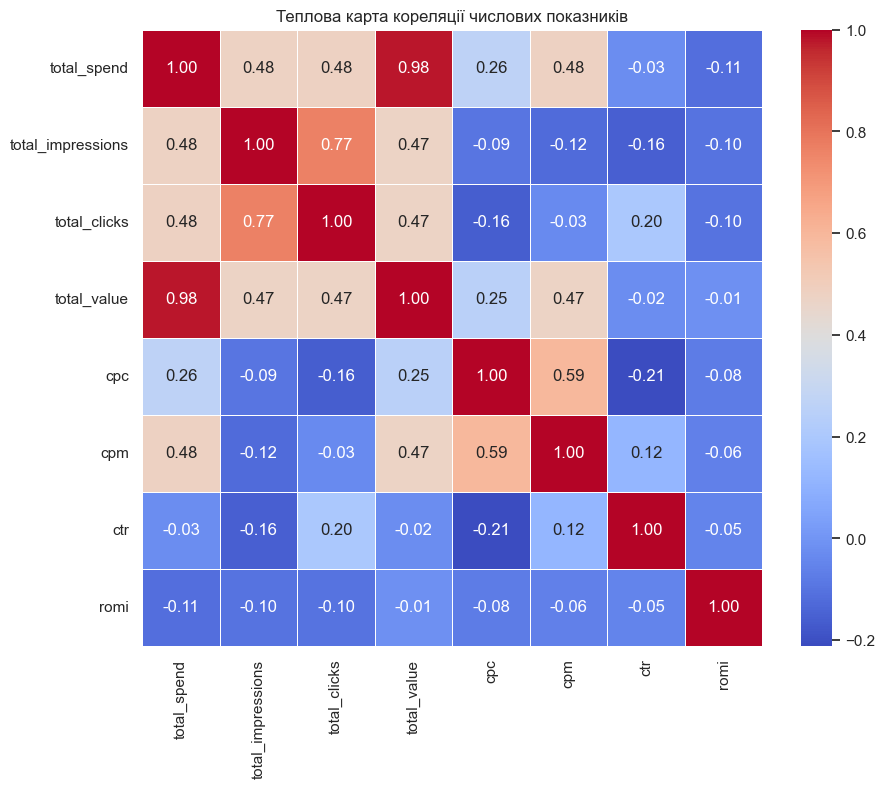

In [25]:
# Вибираємо тільки числові показники для кореляції
numeric_df = df.select_dtypes(include=[np.number])

# Розраховуємо матрицю кореляції
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
           
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
           
plt.title('Теплова карта кореляції числових показників')
plt.show()

In [26]:
# Автоматичний аналіз кореляції
corr_matrix_analysis = corr_matrix.abs()
np.fill_diagonal(corr_matrix_analysis.values, np.nan)

# Знаходимо найвищу кореляцію
highest_corr_series = corr_matrix_analysis.max()
highest_corr_col = highest_corr_series.idxmax()
highest_corr_row = corr_matrix_analysis[highest_corr_col].idxmax()
highest_corr_value = corr_matrix.loc[highest_corr_row, highest_corr_col]

# Знаходимо найнижчу кореляцію
lowest_corr_series = corr_matrix_analysis.min()
lowest_corr_col = lowest_corr_series.idxmin()
lowest_corr_row = corr_matrix_analysis[lowest_corr_col].idxmin()
lowest_corr_value = corr_matrix.loc[lowest_corr_row, lowest_corr_col]

print("Аналіз кореляції")
print(f"Найвища кореляція: {highest_corr_value:.4f} (між '{highest_corr_row}' та '{highest_corr_col}')")
print(f"Найнижча кореляція: {lowest_corr_value:.4f} (між '{lowest_corr_row}' та '{lowest_corr_col}')")

print("\nЗ чим корелює 'total_value'?")
total_value_corr = corr_matrix['total_value'].drop('total_value').sort_values(ascending=False)
print(total_value_corr)

Аналіз кореляції
Найвища кореляція: 0.9789 (між 'total_value' та 'total_spend')
Найнижча кореляція: -0.0137 (між 'romi' та 'total_value')

З чим корелює 'total_value'?
total_spend          0.978890
total_clicks         0.472124
total_impressions    0.472037
cpm                  0.471338
cpc                  0.250851
romi                -0.013733
ctr                 -0.022267
Name: total_value, dtype: float64


## 6. Точкова діаграма регресії

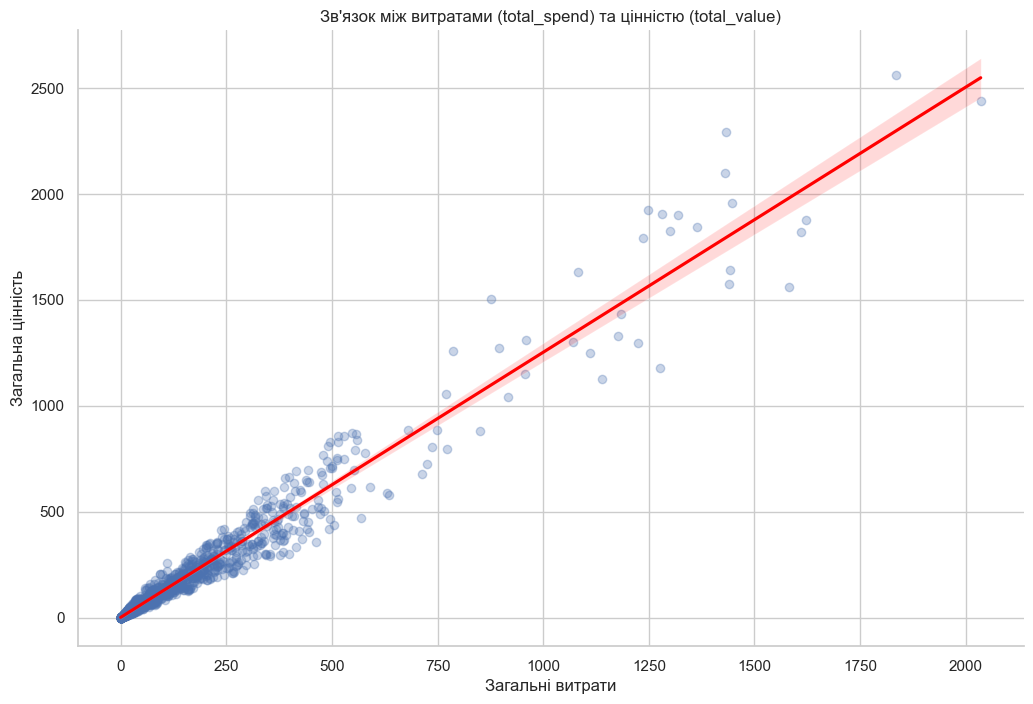

In [27]:
sns.lmplot(data=df, x='total_spend', y='total_value', height=7, aspect=1.5, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.3})

plt.title('Зв\'язок між витратами (total_spend) та цінністю (total_value)')
plt.xlabel('Загальні витрати')
plt.ylabel('Загальна цінність')

plt.show()